# Getting Started with Neural Networks: Classification & Regression

### Loading Libraries

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# TensorFlow Datasets
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.datasets import boston_housing

# Math Computing
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Copy
import copy

### Loading Data - Classifying Movie Reviews: A binary classification example

In [2]:
# Data Uploading
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# Checking restriction as follow:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Decoding reviews back to text as follow:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#### Preparing the data

In [7]:
# Encoding the integer sequence via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    # All zero matrix set-up
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # setting specific indices
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Labels vectorization as follow:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Building your model

###### *output = relu(dot(input, W) + b)*

In [10]:
# Model definition as follow:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

In [11]:
# Compiling the model as follow:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Approach Validation

In [12]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# Model training as follow:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5031 - accuracy: 0.7827 - val_loss: 0.3768 - val_accuracy: 0.8773
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.9063 - val_loss: 0.3133 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9261 - val_loss: 0.2975 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9439 - val_loss: 0.2861 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9547 - val_loss: 0.2887 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9651 - val_loss: 0.2985 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9700 - val_loss: 0.3076 - val_accuracy: 0.8847
Epoch 8/20
30/30 [=

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

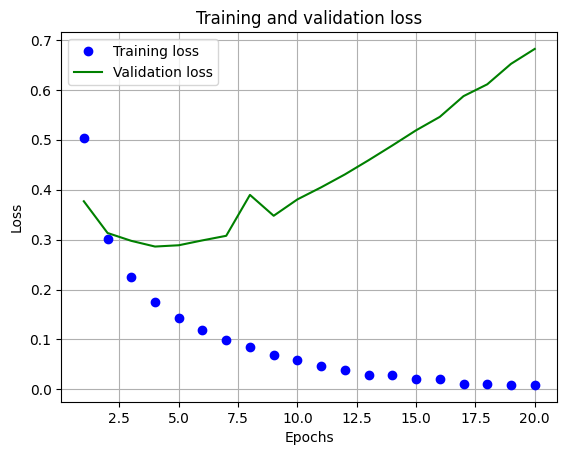

In [15]:
# Plotting the training & validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

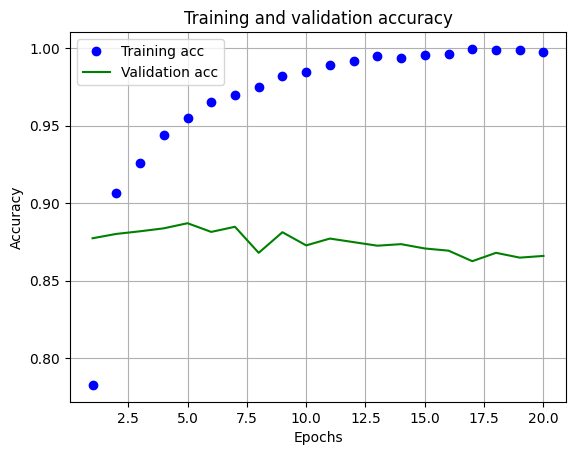

In [16]:
# Plotting the training & validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

In [18]:
# Compiling model as follow:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
# Fitting the model as follow:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9306
Epoch 4/4
49/49 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9408


In [20]:
# Model evaluation
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 0s 293us/step - loss: 0.3184 - accuracy: 0.8763


#### Using a trained model to generate predictions on new data

In [21]:
# Predictions on test set
model.predict(x_test)

782/782 [==============================] - 0s 275us/step


array([[0.1584098 ],
       [0.99816185],
       [0.7907543 ],
       ...,
       [0.08988944],
       [0.0367684 ],
       [0.5398274 ]], dtype=float32)

###### an additional approach

In [22]:
# Addtional retraining model
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid"),
])

In [23]:
# Compiling model as follow:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [24]:
# Fitting the model as follow:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9135
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9337
Epoch 4/4
49/49 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9460


In [25]:
# Model evaluation
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 0s 317us/step - loss: 0.1393 - accuracy: 0.8254


In [26]:
# Predictions on test set
model.predict(x_test)

782/782 [==============================] - 0s 302us/step


array([[0.01407682],
       [0.9994445 ],
       [0.09059004],
       ...,
       [0.02166046],
       [0.00714889],
       [0.2018017 ]], dtype=float32)

### Classifying Newswires: A multiclass classification example

#### The reuters dataset

In [27]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [28]:
len(train_data)

8982

In [29]:
len(test_data)

2246

In [30]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [31]:
# Decoding newswires back to text
word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [32]:
train_labels[0]

3

#### Data Preparation

In [33]:
# Encoding the input data as follow:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
# Encoding labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [35]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#### Building the model

In [36]:
# Model definition as follow:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [37]:
# Compiling the model
model.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

#### Approach Validation

In [38]:
# Setting aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [39]:
# Model training as follow:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 9ms/step - loss: 2.5531 - accuracy: 0.5210 - val_loss: 1.7289 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.4305 - accuracy: 0.7002 - val_loss: 1.3059 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0588 - accuracy: 0.7716 - val_loss: 1.1413 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8306 - accuracy: 0.8236 - val_loss: 1.0205 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6559 - accuracy: 0.8654 - val_loss: 0.9581 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5234 - accuracy: 0.8919 - val_loss: 0.9201 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4215 - accuracy: 0.9121 - val_loss: 0.9219 - val_accuracy: 0.8050
Epoch 8/20
16/16 [==

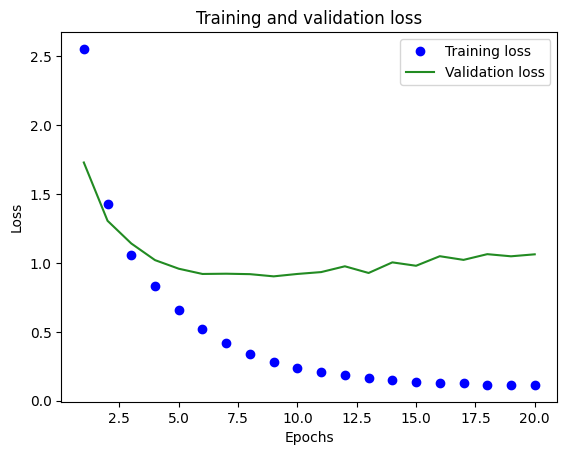

In [40]:
# Plotting the training & validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "forestgreen", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

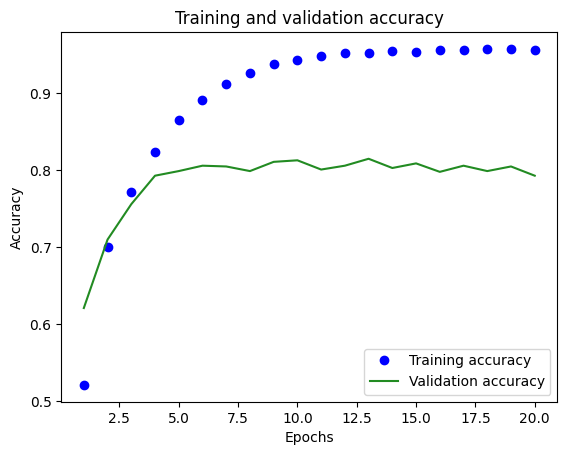

In [41]:
# Plotting the training & validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "forestgreen", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
# Retraining a model from strach
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")])

In [43]:
# Compiling model as follow:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [44]:
# Model training as follow:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/9
16/16 [==============================] - 0s 11ms/step - loss: 2.6225 - accuracy: 0.5451 - val_loss: 1.7892 - val_accuracy: 0.6376
Epoch 2/9
16/16 [==============================] - 0s 7ms/step - loss: 1.4185 - accuracy: 0.7032 - val_loss: 1.3666 - val_accuracy: 0.7075
Epoch 3/9
16/16 [==============================] - 0s 7ms/step - loss: 1.0408 - accuracy: 0.7772 - val_loss: 1.2086 - val_accuracy: 0.7235
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.8199 - accuracy: 0.8231 - val_loss: 1.1055 - val_accuracy: 0.7565
Epoch 5/9
16/16 [==============================] - 0s 7ms/step - loss: 0.6549 - accuracy: 0.8646 - val_loss: 1.0322 - val_accuracy: 0.7729
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.8943 - val_loss: 1.0000 - val_accuracy: 0.7787
Epoch 7/9
16/16 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.9156 - val_loss: 0.9818 - val_accuracy: 0.7792
Epoch 8/9
16/16 [=========

In [45]:
# Empirical checking as follow:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()

0.19590382902938558

#### Generating predictions on new data

In [46]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 433us/step


In [47]:
predictions[0].shape

(46,)

In [48]:
np.sum(predictions[0])

0.99999994

In [49]:
np.argmax(predictions[0])

3

#### A different way to handle the labels and loss

In [50]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [51]:
# Compiling model as follow:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#### The importance of having sufficiently large intermediate layers

In [52]:
# A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [53]:
# Model compilation as follow:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
             )

In [54]:
# Fitting model as:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 0s 3ms/step - loss: 3.2865 - accuracy: 0.1885 - val_loss: 2.7988 - val_accuracy: 0.3730
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 2.4108 - accuracy: 0.3925 - val_loss: 2.2163 - val_accuracy: 0.3900
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 1.9409 - accuracy: 0.4179 - val_loss: 1.8572 - val_accuracy: 0.4230
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 1.5626 - accuracy: 0.5763 - val_loss: 1.5927 - val_accuracy: 0.5950
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 1.3626 - accuracy: 0.6234 - val_loss: 1.5301 - val_accuracy: 0.6100
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 1.2462 - accuracy: 0.6455 - val_loss: 1.4898 - val_accuracy: 0.6230
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 1.1525 - accuracy: 0.6870 - val_loss: 1.4821 - val_accuracy: 0.6450
Epoch 8/20
63/63 [==

##### Appying further experiment

In [58]:
# A model with an information bottleneck experiment A
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [59]:
# Model compilation as follow:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
             )

In [60]:
# Fitting model as:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 0s 5ms/step - loss: 2.9562 - accuracy: 0.2912 - val_loss: 2.1613 - val_accuracy: 0.5630
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.7981 - accuracy: 0.5677 - val_loss: 1.6634 - val_accuracy: 0.5660
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5179 - accuracy: 0.5828 - val_loss: 1.6011 - val_accuracy: 0.5700
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.4095 - accuracy: 0.5891 - val_loss: 1.6032 - val_accuracy: 0.5750
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.3429 - accuracy: 0.5975 - val_loss: 1.6176 - val_accuracy: 0.5750
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2969 - accuracy: 0.6065 - val_loss: 1.6000 - val_accuracy: 0.5920
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2574 - accuracy: 0.6100 - val_loss: 1.6490 - val_accuracy: 0.5960
Epoch 8/20
63/63 [==

### Predicting House Prices: A regression example

#### The Boston Housing Price Dataset

In [62]:
# Setting data as follow:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [63]:
train_data.shape

(404, 13)

In [64]:
test_data.shape

(102, 13)

In [65]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

#### Preparing Data

In [66]:
# Data Normalization as follow:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### Model Building

In [70]:
# Model definition and compiling as follow:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    # Model compilation
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

#### Validation approach using: K-fold validation

In [71]:
# K-fold validation as follow:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [72]:
all_scores

[1.9923286437988281, 2.484081983566284, 2.4652891159057617, 2.42132830619812]

In [73]:
np.mean(all_scores)

2.3407570123672485

In [74]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [75]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

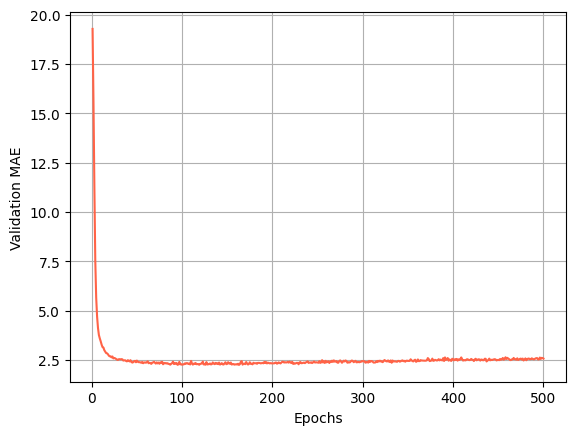

In [79]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, color='tomato')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.grid(True)
plt.show()

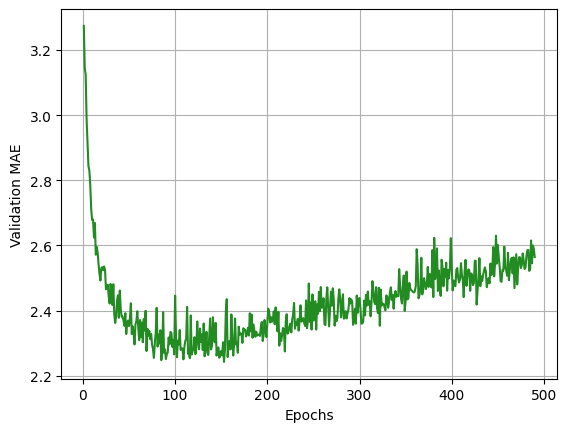

In [80]:
# Plotting validation score, excluding thr first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history, color='forestgreen')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.grid(True)
plt.show()

In [81]:
# Training the final model as follow:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)

In [82]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 748us/step - loss: 14.8571 - mae: 2.5355


In [83]:
test_mae_score

2.5354669094085693

#### Generating Predictions

In [84]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 602us/step


array([9.2514515], dtype=float32)